## Greenery in Pittsburgh

first, import the necessities (pandas, geopandas, matplot, and the neighborhoods shape file) to analyze the data

In [28]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

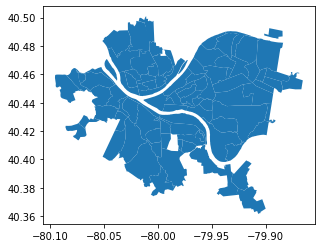

In [12]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

### parks!
to figure out which neighborhood is the greenest, i compared the total sqft of parks in each neighborhood      
one of the parks files had a neighborhood data point and the other had the sqft, so i imported both and combined them to get all the information

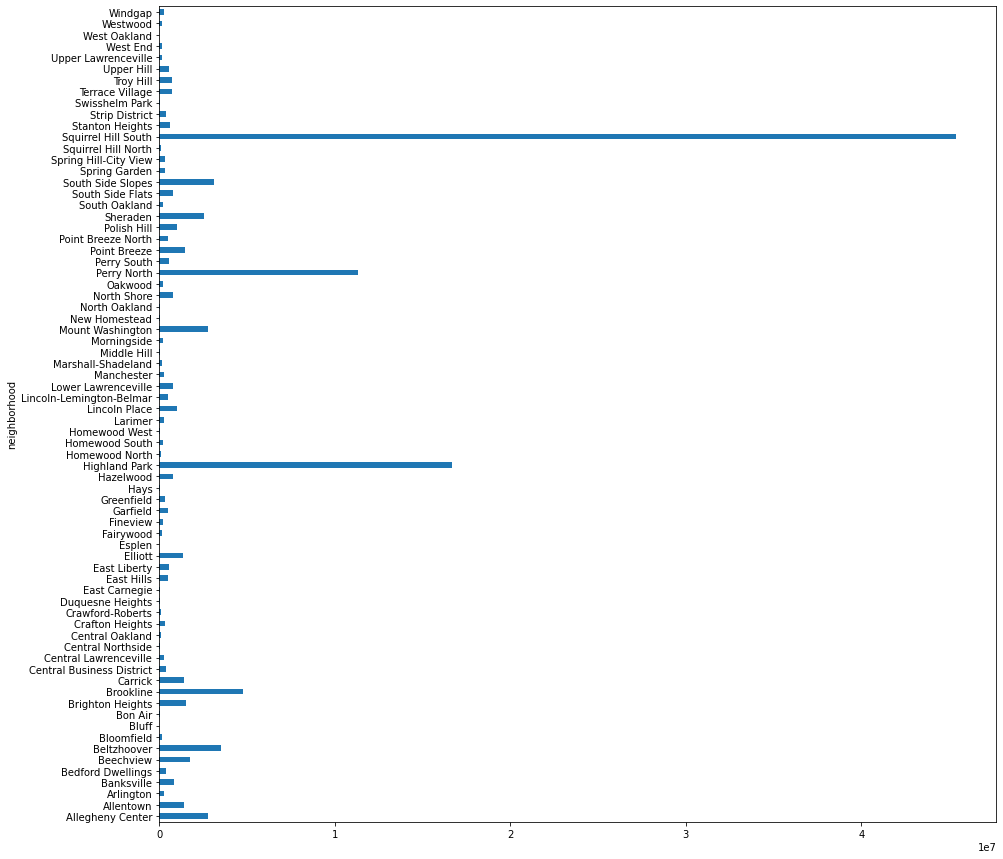

In [13]:
## read in the files
cparks = pd.read_csv("cityparks.csv")
pparks = pd.read_csv("pittparks.csv")

## merge the csvs by park name
parks = pd.merge(cparks, pparks, left_on="name", right_on = "updatepknm")
parks = parks[["neighborhood", "sqft"]]

## plot the file using a bar graph to visualize
parks_graph = parks.pivot(columns = "neighborhood", values = "sqft")
parks_graph.sum().plot.barh(figsize = (15,15))

although there's a pretty clear winner here, it's more fun to visualize it with a map!

In [14]:
# create database with total sqft to map it
num_feet = parks.groupby("neighborhood").sum()['sqft']
num_feet.sort_values(ascending=False)

neighborhood
Squirrel Hill South    4.542749e+07
Highland Park          1.668423e+07
Perry North            1.133439e+07
Brookline              4.779746e+06
Beltzhoover            3.491360e+06
                           ...     
Homewood West          1.866649e+04
North Oakland          1.126342e+04
Esplen                 5.775499e+03
Bluff                  4.716919e+03
West Oakland           2.336813e+03
Name: sqft, Length: 72, dtype: float64

In [15]:
# merge databases
parks_map = neighborhoods.merge(num_feet, how='left', left_on='hood', right_on='neighborhood')

# make sure it merged correctly
parks_map[['hood','sqft','geometry']].head()

,hood,sqft,geometry
0,Central Oakland,80327.390261,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,11263.421139,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,2336.812919,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,81089.622308,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,362323.431602,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


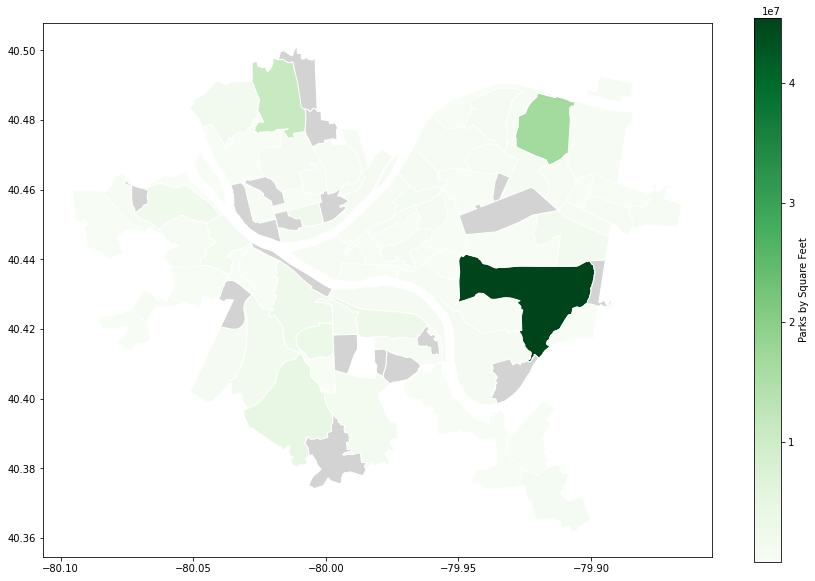

In [16]:
# draw the map!
parks_map.plot(column='sqft', 
               cmap='Greens',              
               edgecolor="white",       
               legend=True,              
               legend_kwds={'label': "Parks by Square Feet"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"}
               )

look how pretty!     
       
as you can see, **squirrel hill south** has the most park space by sqft

### trees

next, we'll compare the tree presence in each of the neighborhoods.     
to start, i read in the data for city-managed trees

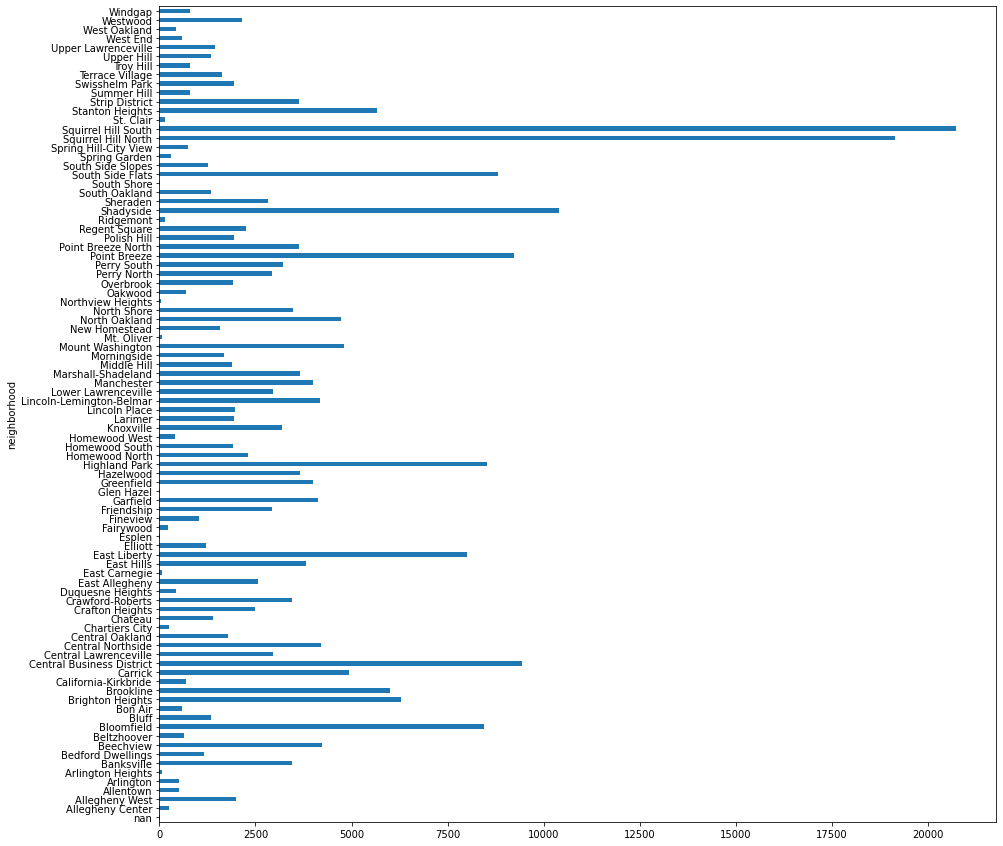

In [17]:
trees_data = pd.read_csv("trees.csv")

## remove values that are stumps (these do not add to the greenery of a neighborhood)
trees = trees_data.query("common_name != 'Stump'")
## also make sure all the trees recorded have a width to be compared
trees = trees.query("width > 0")
trees = trees[["neighborhood","width"]]

trees_graph = trees.pivot(columns = "neighborhood", values = "width")

## then plot the data in a bar graph to visualize it
trees_graph.sum().plot.barh(figsize = (15,15))

let's map it again.     
first, we're going to change the database so it's comparing the canopies of the trees (or the leafiness/greeness).     
on average, the trunk to canopy ratio is 1:18, so we'll multiply this database by 18 to get the canopy for each tree

In [18]:
canopy = trees.groupby("neighborhood").sum()*18
print(canopy) ## print it to make sure it's correct

                       width
neighborhood                
Allegheny Center      4572.0
Allegheny West       35910.0
Allentown             9306.0
Arlington             9342.0
Arlington Heights     1026.0
...                      ...
Upper Lawrenceville  25938.0
West End             10710.0
West Oakland          7884.0
Westwood             38502.0
Windgap              14238.0

[89 rows x 1 columns]


now, we can merge it to create the map

In [19]:
# do the merge
trees_map = neighborhoods.merge(canopy, how='left', left_on='hood', right_on='neighborhood')

# make sure it's correct
trees_map[['hood','width','geometry']].head(10)

,hood,width,geometry
0,Central Oakland,32364.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,84852.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,7884.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,62046.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,65430.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
5,Central Business District,169776.0,"POLYGON ((-79.99238 40.44484, -79.99233 40.444..."
6,Spring Hill-City View,13230.0,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
7,Perry South,58122.0,"POLYGON ((-80.01456 40.47727, -80.01462 40.477..."
8,Summer Hill,14454.0,"POLYGON ((-80.01087 40.50097, -80.01073 40.499..."
9,Northview Heights,810.0,"POLYGON ((-80.00327 40.48271, -80.00326 40.482..."


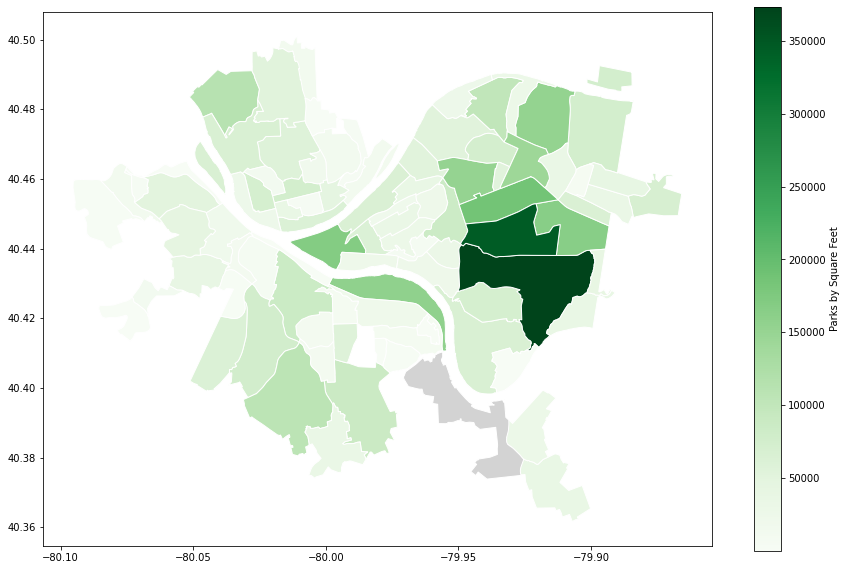

In [20]:
# draw the map
trees_map.plot(column='width', 
               cmap='Greens',              
               edgecolor="white",        
               legend=True,             
               legend_kwds={'label': "Parks by Square Feet"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )

this, again, clearly shows that **squirrel hill south** has the most greenery by trees

## total greenery!
now, let's combine the data to figure out which neighborhood is truly the greenest (nature-wise)

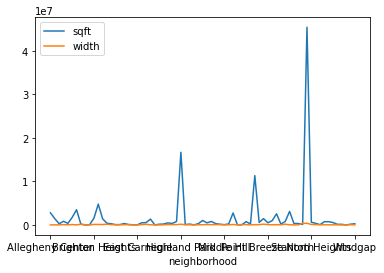

In [21]:
greenery = pd.merge(num_feet, canopy, left_on = "neighborhood", right_on = "neighborhood") # merge the data!
greenery.plot() # plot it to see how they compare

the data from the parks database clearly overpowers the trees data, but i believe the data is equally important.     
so, lets divide the sqft data by 100 to make the values more similar

In [22]:
sqft = num_feet/100
sqft.head(10) # make sure it worked

neighborhood
Allegheny Center     27839.572257
Allentown            14339.683051
Arlington             2529.968877
Banksville            8368.559578
Bedford Dwellings     3520.344908
Beechview            17276.124578
Beltzhoover          34913.599164
Bloomfield            1635.014168
Bluff                   47.169189
Bon Air                339.535608
Name: sqft, dtype: float64

now lets add the edited sqft data to the trees data

In [23]:
greenery = pd.merge(sqft, canopy, left_on = "neighborhood", right_on = "neighborhood")
total = []
# add all the data to a list
for row, index in greenery.iterrows():
    greens = index["width"] + index["sqft"]
    total.append(greens) 

In [24]:
# add the list as a column in the greenery dataframe
greenery["total"] = total

# drop the sqft and width
greenery = greenery.drop(columns=['sqft', 'width'])

print(greenery)

                            total
neighborhood                     
Allegheny Center     32411.572257
Allentown            23645.683051
Arlington            11871.968877
Banksville           70378.559578
Bedford Dwellings    24580.344908
...                           ...
Upper Lawrenceville  27245.732610
West End             11994.940496
West Oakland          7907.368129
Westwood             40080.941210
Windgap              16916.258605

[71 rows x 1 columns]


In [25]:
# do the merge
green_map = neighborhoods.merge(greenery, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
green_map[['hood','total','geometry']].head(10)

,hood,total,geometry
0,Central Oakland,33167.273903,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,84964.634211,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,7907.368129,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,62856.896223,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,69053.234316,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
5,Central Business District,173575.099968,"POLYGON ((-79.99238 40.44484, -79.99233 40.444..."
6,Spring Hill-City View,16529.654760,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
7,Perry South,63752.605529,"POLYGON ((-80.01456 40.47727, -80.01462 40.477..."
8,Summer Hill,NaN,"POLYGON ((-80.01087 40.50097, -80.01073 40.499..."
9,Northview Heights,NaN,"POLYGON ((-80.00327 40.48271, -80.00326 40.482..."


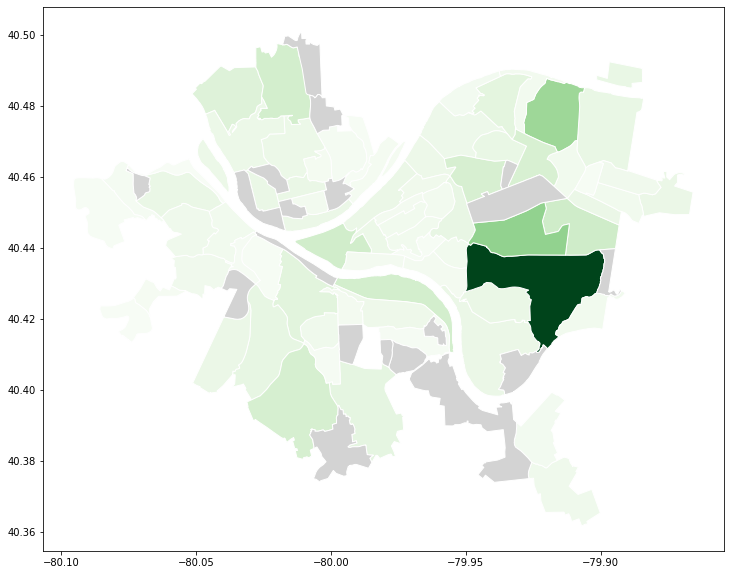

In [26]:
# now let's map it
green_map.plot(column='total',
               cmap='Greens',              
               edgecolor="white",        
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )

### total greenery winner: squirrel hill south!!

![Squirrels!](https://media.giphy.com/media/1SvnHJFEuEH7hp81tF/giphy-downsized-large.gif)